# Wisconsin Breast Cancer Prediction

## Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
import pickle
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.metrics import (precision_score, accuracy_score, recall_score, f1_score)
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
col_names = ['sample_code_number', 'clump_thickness', 'uniformity_of_cell_size',
             'uniformity_of_cell_shape', 'marginal_adhesion', 'single_epithelial_cell_size',
             'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
data = pd.read_csv(url, names=col_names)
print(data)

     sample_code_number  clump_thickness  uniformity_of_cell_size  \
0               1000025                5                        1   
1               1002945                5                        4   
2               1015425                3                        1   
3               1016277                6                        8   
4               1017023                4                        1   
..                  ...              ...                      ...   
694              776715                3                        1   
695              841769                2                        1   
696              888820                5                       10   
697              897471                4                        8   
698              897471                4                        8   

     uniformity_of_cell_shape  marginal_adhesion  single_epithelial_cell_size  \
0                           1                  1                            2   
1        

## Exploratory Data Analysis and Data Preprocessing

In [3]:
data = pd.DataFrame(data)
data.head(20)

,sample_code_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [4]:
data.tail(20)

,sample_code_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
679,1368882,2,1,1,1,2,1,1,1,1,2
680,1369821,10,10,10,10,5,10,10,10,7,4
681,1371026,5,10,10,10,4,10,5,6,3,4
682,1371920,5,1,1,1,2,1,3,2,1,2
683,466906,1,1,1,1,2,1,1,1,1,2
684,466906,1,1,1,1,2,1,1,1,1,2
685,534555,1,1,1,1,2,1,1,1,1,2
686,536708,1,1,1,1,2,1,1,1,1,2
687,566346,3,1,1,1,2,1,2,3,1,2
688,603148,4,1,1,1,2,1,1,1,1,2


In [4]:
data.shape

(699, 11)

In [5]:
data.columns

Index(['sample_code_number', 'clump_thickness', 'uniformity_of_cell_size',
       'uniformity_of_cell_shape', 'marginal_adhesion',
       'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin',
       'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   sample_code_number           699 non-null    int64 
 1   clump_thickness              699 non-null    int64 
 2   uniformity_of_cell_size      699 non-null    int64 
 3   uniformity_of_cell_shape     699 non-null    int64 
 4   marginal_adhesion            699 non-null    int64 
 5   single_epithelial_cell_size  699 non-null    int64 
 6   bare_nuclei                  699 non-null    object
 7   bland_chromatin              699 non-null    int64 
 8   normal_nucleoli              699 non-null    int64 
 9   mitoses                      699 non-null    int64 
 10  class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [7]:
data.describe()

,sample_code_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


*   Based from dataset info, cancer classes are divided into benign (noncancerous) and malignant (cancerous) acording to standfordhealthcare.org
*   bare_nuclei has object data type object which won't be working well in machine learning algorithm, therefore we should change bare nuclei data type



In [8]:
data['bare_nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nuclei, dtype: int64

We can see that bare_nuclei actually has invalid value '?'

For treating this, we will change the '?' value with majority value which is '1'

And then, cast the bare_nuclei type into int64

In [9]:
data['bare_nuclei'].values[data['bare_nuclei'] == '?'] = '1'
data['bare_nuclei'].value_counts()

1     418
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: bare_nuclei, dtype: int64

In [10]:
data['bare_nuclei'] = data['bare_nuclei'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   sample_code_number           699 non-null    int64
 1   clump_thickness              699 non-null    int64
 2   uniformity_of_cell_size      699 non-null    int64
 3   uniformity_of_cell_shape     699 non-null    int64
 4   marginal_adhesion            699 non-null    int64
 5   single_epithelial_cell_size  699 non-null    int64
 6   bare_nuclei                  699 non-null    int64
 7   bland_chromatin              699 non-null    int64
 8   normal_nucleoli              699 non-null    int64
 9   mitoses                      699 non-null    int64
 10  class                        699 non-null    int64
dtypes: int64(11)
memory usage: 60.2 KB


### Check for Missing Data

In [11]:
data.isna().sum()

sample_code_number             0
clump_thickness                0
uniformity_of_cell_size        0
uniformity_of_cell_shape       0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitoses                        0
class                          0
dtype: int64

There's no missing data in our dataset

### Check for Data Duplication

In [12]:
data.duplicated().sum()

9

There are 9 data duplication in our dataset

Therefore, we should drop the data duplication

In [13]:
data.drop_duplicates(keep='first', inplace = True)

In [14]:
data.duplicated().sum()

0

### Checking Class Distribution

In [15]:
sum = pd.DataFrame(data['class'].value_counts().reset_index())
sum

,index,class
0,2,452
1,4,238


Index Class 2 represents Benign

Index Class 4 represents Malignant

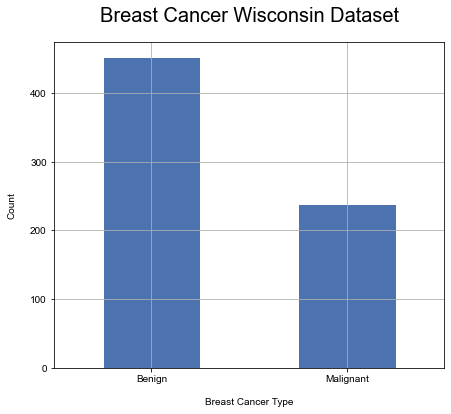

In [16]:
fig, ax = plt.subplots()
sns.set(font_scale = 1.4)
data['class'].value_counts().plot(kind='bar', figsize=(7, 6), rot = 0)
plt.xlabel('Breast Cancer Type', labelpad=14)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = ['Benign', 'Malignant']
ax.set_xticklabels(labels)
plt.ylabel('Count', labelpad=14)
plt.title('Breast Cancer Wisconsin Dataset', fontsize = 20, pad = 20)
# plt.savefig('Wisconsin.png')
plt.show()

Based from the visualization above we can notice that there's an imbalance amount of both cancer class

### Checking for Outliers

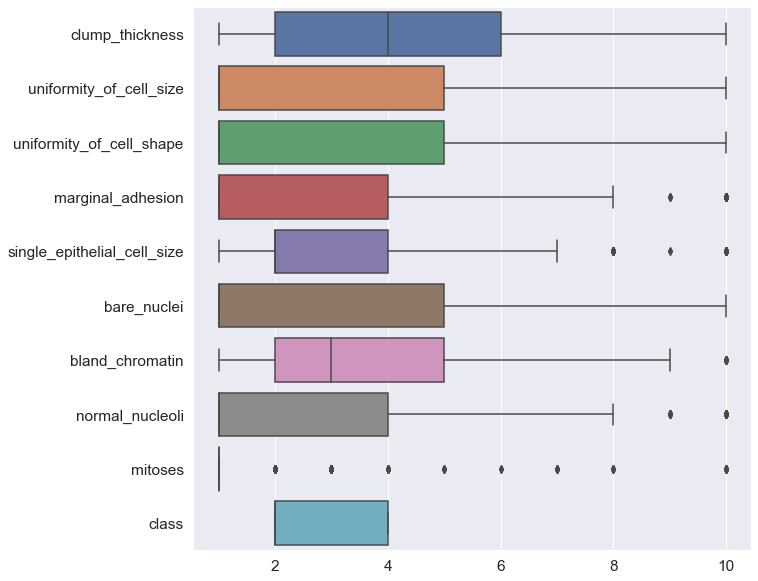

In [17]:
data_outl = data.drop('sample_code_number', axis = 1)

plt.figure(figsize=(10, 10))
sns.boxplot(data = data_outl, orient = 'h');

Based from visualization above, we can see that marginal_adhesion, single_epithelial_cell_size, bland_chromatin, and normal_nucleoli has some outliers

In [18]:
print("Value counts of marginal_adhesion\n", data_outl['marginal_adhesion'].value_counts())
print("\nValue counts of single_epithelial_cell_size\n", data_outl['single_epithelial_cell_size'].value_counts())
print("\nValue counts of bland_chromatin\n", data_outl['bland_chromatin'].value_counts())
print("\nValue counts of normal_nucleoli\n", data_outl['normal_nucleoli'].value_counts())


Value counts of marginal_adhesion
 1     400
3      58
2      56
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: marginal_adhesion, dtype: int64

Value counts of single_epithelial_cell_size
 2     382
3      71
4      48
1      45
6      41
5      39
10     30
8      20
7      12
9       2
Name: single_epithelial_cell_size, dtype: int64

Value counts of bland_chromatin
 2     165
3     160
1     151
7      71
4      40
5      34
8      28
10     20
9      11
6      10
Name: bland_chromatin, dtype: int64

Value counts of normal_nucleoli
 1     436
10     61
3      42
2      36
8      24
6      22
5      19
4      18
7      16
9      16
Name: normal_nucleoli, dtype: int64


Based on the value_counts analysis above, we will treat the outliers only on marginal_adhesion and single_epithelial_cell_size.

#### Outliers Handling using Log Transformation

We will perform log transformation method for treating outliers on marginal_adhesion and single_epithelial_cell_size considering the amount of our data. 

We will use log transform because it is not affected by outliers thus avoiding data loss.

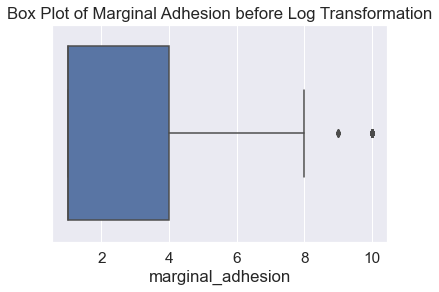

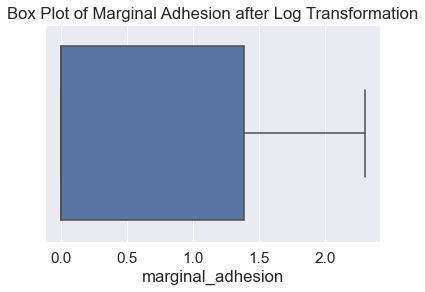

In [19]:
sns.boxplot(data_outl['marginal_adhesion'])
plt.title("Box Plot of Marginal Adhesion before Log Transformation")
plt.show()

# Performing Log Transformation
data_outl['marginal_adhesion'] = np.log(data_outl['marginal_adhesion'])

sns.boxplot(data_outl['marginal_adhesion'])
plt.title("Box Plot of Marginal Adhesion after Log Transformation")
plt.show()

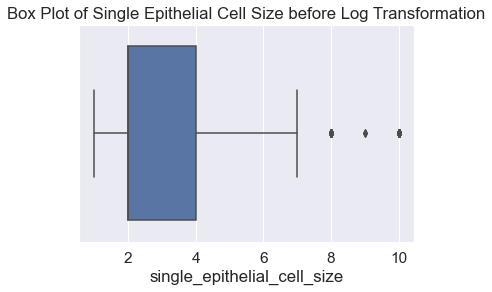

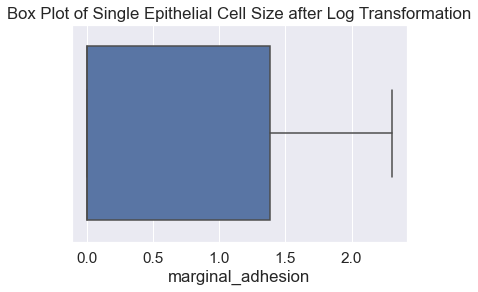

In [20]:
sns.boxplot(data_outl['single_epithelial_cell_size'])
plt.title("Box Plot of Single Epithelial Cell Size before Log Transformation")
plt.show()

# Performing Log Transformation
data_outl['single_epithelial_cell_size'] = np.log(data_outl['single_epithelial_cell_size'])

sns.boxplot(data_outl['marginal_adhesion'])
plt.title("Box Plot of Single Epithelial Cell Size after Log Transformation")
plt.show()

### Class Labeling

In [21]:
data_outl

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,0.000000,0.693147,1,3,1,1,2
1,5,4,4,1.609438,1.945910,10,3,2,1,2
2,3,1,1,0.000000,0.693147,2,3,1,1,2
3,6,8,8,0.000000,1.098612,4,3,7,1,2
4,4,1,1,1.098612,0.693147,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,0.000000,1.098612,2,1,1,1,2
695,2,1,1,0.000000,0.693147,1,1,1,1,2
696,5,10,10,1.098612,1.945910,3,8,10,2,4
697,4,8,6,1.386294,1.098612,4,10,6,1,4


### Label Encoding

In [22]:
def cancer_class(num):
  if num == 2:
    return 'Benign'
  elif num == 4:
    return 'Malignant'

In [23]:
data_class = data_outl.copy()
data_class.head(3)

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,0.000000,0.693147,1,3,1,1,2
1,5,4,4,1.609438,1.945910,10,3,2,1,2
2,3,1,1,0.000000,0.693147,2,3,1,1,2


In [24]:
label_encoder = preprocessing.LabelEncoder()

In [25]:
# Encode labels in column 'cancer class'
data_class['class'] = label_encoder.fit_transform(data_class['class'])
data_class['class'].unique()

array([0, 1], dtype=int64)

In [26]:
data_class.head(3)

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,0.000000,0.693147,1,3,1,1,0
1,5,4,4,1.609438,1.945910,10,3,2,1,0
2,3,1,1,0.000000,0.693147,2,3,1,1,0


**0 = Benign**

**1 = Malignant** 

In [27]:
data_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   clump_thickness              690 non-null    int64  
 1   uniformity_of_cell_size      690 non-null    int64  
 2   uniformity_of_cell_shape     690 non-null    int64  
 3   marginal_adhesion            690 non-null    float64
 4   single_epithelial_cell_size  690 non-null    float64
 5   bare_nuclei                  690 non-null    int64  
 6   bland_chromatin              690 non-null    int64  
 7   normal_nucleoli              690 non-null    int64  
 8   mitoses                      690 non-null    int64  
 9   class                        690 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 59.3 KB


## First Research Scenario

### Feature Standardization (Feature Scaling)

In [28]:
scaler = StandardScaler()
scaler.fit(data_class.drop('class', axis = 1))

StandardScaler()

In [29]:
data_fe = data_class.drop('class', axis = 1)
scaled_features = scaler.transform(data_fe)
columns = ['clump_thickness', 'uniformity_of_cell_size', 'uniformity_of_cell_shape',
           'marginal_adhesion', 'single_epithelial_cell_size', 'bare_nuclei', 
           'bland_chromatin', 'normal_nucleoli', 'mitoses']

data_fs = pd.DataFrame(scaled_features, columns = columns)
data_fs.head(3)

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
0,0.202823,-0.701698,-0.74504,-0.761144,-0.531871,-0.686858,-0.178616,-0.615082,-0.344869
1,0.202823,0.285065,0.26892,1.161516,1.703235,1.803153,-0.178616,-0.288866,-0.344869
2,-0.507572,-0.701698,-0.74504,-0.761144,-0.531871,-0.410190,-0.178616,-0.615082,-0.344869


### Copying the Data

In [30]:
data_first = data_fs.copy()
data_second = data_fs.copy()

### Feature Selection

In [31]:
X = data_first
y = data_class['class']

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}
           
kfold = model_selection.KFold(n_splits = 10, shuffle = True)

### Breast Cancer Prediction using Random Forest Classifier with 10 K-folds CV

In [32]:
rand_forest = RandomForestClassifier(n_estimators = 40, random_state = 0)

randf_results = sklearn.model_selection.cross_validate(estimator = rand_forest,
                                                       X = X, 
                                                       y = y,
                                                       cv = kfold,
                                                       scoring = scoring)

In [33]:
randf_accuracy = round((np.mean(randf_results.get('test_accuracy'))), 3)
randf_precision = round((np.mean(randf_results.get('test_precision'))), 3)
randf_recall = round((np.mean(randf_results.get('test_recall'))), 3)
randf_f1score = round((np.mean(randf_results.get('test_f1_score'))), 3)

print('Random Forest Performance Evaluation (K-Fold Cross Val)\n')
print(f'Accuracy Score   : {randf_accuracy}')
print(f'Precision Score  : {randf_precision}')
print(f'Recall Score     : {randf_recall}')
print(f'F1-Measure Score : {randf_f1score}')

Random Forest Performance Evaluation (K-Fold Cross Val)

Accuracy Score   : 0.965
Precision Score  : 0.942
Recall Score     : 0.958
F1-Measure Score : 0.949


In [34]:
sorted(randf_results.keys())

['fit_time',
 'score_time',
 'test_accuracy',
 'test_f1_score',
 'test_precision',
 'test_recall']

### Breast Cancer Prediction using Gaussian Naive Bayes Classifier with 10 K-folds CV

In [35]:
gaussianNB = GaussianNB()

gnb_results = sklearn.model_selection.cross_validate(estimator = gaussianNB,
                                                     X = X, 
                                                     y = y,
                                                     cv = kfold,
                                                     scoring = scoring)

In [36]:
gaussianNB_accuracy = round((np.mean(gnb_results.get('test_accuracy'))), 3)
gaussianNB_precision = round((np.mean(gnb_results.get('test_precision'))), 3)
gaussianNB_recall = round((np.mean(gnb_results.get('test_recall'))), 3)
gaussianNB_f1score = round((np.mean(gnb_results.get('test_f1_score'))), 3)

print('Gaussian Naive Bayes Performance Evaluation (K-Fold Cross Val)\n')
print(f'Accuracy Score   : {gaussianNB_accuracy}')
print(f'Precision Score  : {gaussianNB_precision}')
print(f'Recall Score     : {gaussianNB_recall}')
print(f'F1-Measure Score : {gaussianNB_f1score}')

Gaussian Naive Bayes Performance Evaluation (K-Fold Cross Val)

Accuracy Score   : 0.958
Precision Score  : 0.913
Recall Score     : 0.97
F1-Measure Score : 0.939


### First Research Scenario Conclusion

Based from first research scenario result, we can put the result into Tabel 3, which shown by figure below.

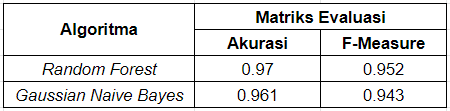

Overall, Random Forest algorithm perform slightly better on both metrics evaluation using accuracy and F-measure compared to Gaussian Naive Bayes on the first research scenario.

## Second Research Scenario

In [37]:
data_second.head(3)

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
0,0.202823,-0.701698,-0.74504,-0.761144,-0.531871,-0.686858,-0.178616,-0.615082,-0.344869
1,0.202823,0.285065,0.26892,1.161516,1.703235,1.803153,-0.178616,-0.288866,-0.344869
2,-0.507572,-0.701698,-0.74504,-0.761144,-0.531871,-0.410190,-0.178616,-0.615082,-0.344869


### Checking Class Distribution

#### Class Distribution Before Using Borderline SMOTE

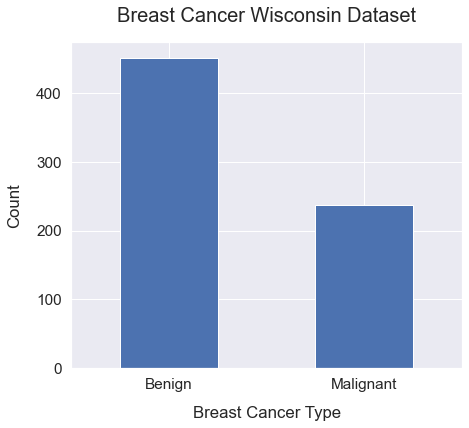

In [38]:
fig, ax = plt.subplots()
sns.set(font_scale = 1.4)
data['class'].value_counts().plot(kind='bar', figsize=(7, 6), rot = 0)
plt.xlabel('Breast Cancer Type', labelpad=14)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = ['Benign', 'Malignant']
ax.set_xticklabels(labels)
plt.ylabel('Count', labelpad=14)
plt.title('Breast Cancer Wisconsin Dataset', fontsize = 20, pad = 20)
# plt.savefig('Wisconsin.png')
plt.show()

#### Balancing Class Distribution Using Borderline SMOTE

In [39]:
data_second = data_class.copy()
data_second.head(2)

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,0.000000,0.693147,1,3,1,1,0
1,5,4,4,1.609438,1.945910,10,3,2,1,0


In [40]:
X_bal = data_second.drop(columns='class')
y_bal = data_second['class']

bsm = BorderlineSMOTE(random_state = 42)

X_res, y_res = bsm.fit_resample(X_bal, y_bal)

In [69]:
X_res.head()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
0,5,1,1,0.000000,0.693147,1,3,1,1
1,5,4,4,1.609438,1.945910,10,3,2,1
2,3,1,1,0.000000,0.693147,2,3,1,1
3,6,8,8,0.000000,1.098612,4,3,7,1
4,4,1,1,1.098612,0.693147,1,3,1,1


In [53]:
y_res

0      0
1      0
2      0
3      0
4      0
      ..
899    1
900    1
901    1
902    1
903    1
Name: class, Length: 904, dtype: int64

In [42]:
y_res.value_counts()

0    452
1    452
Name: class, dtype: int64

#### Class Distribution After Using Borderline SMOTE

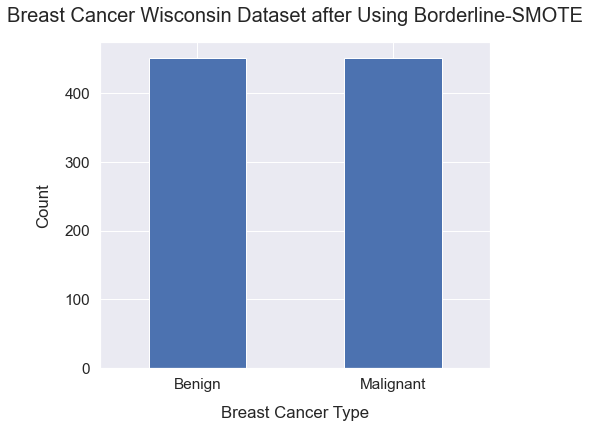

In [43]:
fig, ax = plt.subplots()
sns.set(font_scale = 1.4)
y_res.value_counts().plot(kind='bar', figsize=(7, 6), rot = 0)
plt.xlabel('Breast Cancer Type', labelpad=14)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = ['Benign', 'Malignant']
ax.set_xticklabels(labels)
plt.ylabel('Count', labelpad=14)
plt.title('Breast Cancer Wisconsin Dataset after Using Borderline-SMOTE', fontsize = 20, pad = 20)
# plt.savefig('Wisconsin.png')
plt.show()

### Feature Standardization (Feature Scaling)

In [58]:
X_bal = X_res.copy()
y_bal = y_res.copy()

bsm_scaler = StandardScaler()
bsm_scaler.fit(X_bal)

StandardScaler()

In [59]:
bal_fe = X_res.copy()
bsm_scaled_features = bsm_scaler.transform(bal_fe)
columns = ['clump_thickness', 'uniformity_of_cell_size', 'uniformity_of_cell_shape',
           'marginal_adhesion', 'single_epithelial_cell_size', 'bare_nuclei', 
           'bland_chromatin', 'normal_nucleoli', 'mitoses']

bal_fs = pd.DataFrame(bsm_scaled_features, columns = columns)
bal_fs.head(3)

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
0,0.151743,-0.805169,-0.861167,-0.868595,-0.666349,-0.685941,-0.183838,-0.696156,-0.312254
1,0.151743,0.298226,0.279207,1.068263,1.609839,2.096120,-0.183838,-0.371929,-0.312254
2,-0.629885,-0.805169,-0.861167,-0.868595,-0.666349,-0.376823,-0.183838,-0.696156,-0.312254


### Copying the Data

In [77]:
bal_fs.tail()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
899,0.151743,-0.437371,-0.100918,0.324168,-0.594274,-0.067705,-0.183838,-0.047702,-0.312254
900,-0.629885,-0.069572,-0.100918,1.360318,0.180029,-0.376823,-0.183838,-0.047702,-0.312254
901,0.933372,0.298226,0.659331,0.404773,0.384657,-0.685941,0.279085,-0.371929,-0.312254
902,0.542557,0.298226,0.659331,0.884238,1.490513,-0.685941,-0.183838,-0.371929,-0.312254
903,0.542557,-0.437371,-0.100918,-0.868595,0.822592,-0.067705,-0.183838,1.897661,-0.312254


In [94]:
bal_data = bal_fs.copy()

### Feature Selection

In [95]:
X_bsm = bal_data
y_bsm = y_bal

bsm_scoring = {'accuracy' : make_scorer(accuracy_score),
               'precision' : make_scorer(precision_score),
               'recall' : make_scorer(recall_score),
               'f1_score' : make_scorer(f1_score)}
           
bsm_kfold = model_selection.KFold(n_splits = 10, shuffle = True)

### Breast Cancer Prediction using Random Forest Classifier with 10 K-folds CV with Borderline-SMOTE

In [96]:
rf_bsm = RandomForestClassifier(n_estimators = 40, random_state = 0)

rf_bsm_results = sklearn.model_selection.cross_validate(estimator = rf_bsm,
                                                        X = X_bsm, 
                                                        y = y_bsm,
                                                        cv = bsm_kfold,
                                                        scoring = bsm_scoring)

In [97]:
rf_bsm_accuracy = round((np.mean(rf_bsm_results.get('test_accuracy'))), 3)
rf_bsm_precision = round((np.mean(rf_bsm_results.get('test_precision'))), 3)
rf_bsm_recall = round((np.mean(rf_bsm_results.get('test_recall'))), 3)
rf_bsm_f1score = round((np.mean(rf_bsm_results.get('test_f1_score'))), 3)

print('Random Forest Performance Evaluation (K-Fold Cross Val)\n')
print(f'Accuracy Score   : {rf_bsm_accuracy}')
print(f'Precision Score  : {rf_bsm_precision}')
print(f'Recall Score     : {rf_bsm_recall}')
print(f'F1-Measure Score : {rf_bsm_f1score}')

Random Forest Performance Evaluation (K-Fold Cross Val)

Accuracy Score   : 0.973
Precision Score  : 0.957
Recall Score     : 0.991
F1-Measure Score : 0.973


### Breast Cancer Prediction using Gaussian Naive Bayes Classifier with 10 K-folds CV with Borderline-SMOTE

In [98]:
gnb_bsm = GaussianNB()

gnb_bsm_results = sklearn.model_selection.cross_validate(estimator = gnb_bsm,
                                                         X = X_bsm, 
                                                         y = y_bsm,
                                                         cv = bsm_kfold,
                                                         scoring = bsm_scoring)

In [99]:
gnb_bsm_accuracy = round((np.mean(gnb_bsm_results.get('test_accuracy'))), 3)
gnb_bsm_precision = round((np.mean(gnb_bsm_results.get('test_precision'))), 3)
gnb_bsm_recall = round((np.mean(gnb_bsm_results.get('test_recall'))), 3)
gnb_bsm_f1score = round((np.mean(gnb_bsm_results.get('test_f1_score'))), 3)

print('Gaussian Naive Bayes Performance Evaluation (K-Fold Cross Val)\n')
print(f'Accuracy Score   : {gnb_bsm_accuracy}')
print(f'Precision Score  : {gnb_bsm_precision}')
print(f'Recall Score     : {gnb_bsm_recall}')
print(f'F1-Measure Score : {gnb_bsm_f1score}')

Gaussian Naive Bayes Performance Evaluation (K-Fold Cross Val)

Accuracy Score   : 0.884
Precision Score  : 0.94
Recall Score     : 0.822
F1-Measure Score : 0.876


### Second Research Scenario Conclusion

Based from second research scenario result, we can put the result into Tabel 4, which shown by figure below.

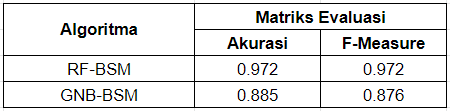

Second research scenario giving us a remarkable result. The combination of Random Forest and Borderline SMOTE successfully improving the performance by increasing the accuracy into 97.2% and the F-Measure into 97.2%. Meanwhile the combination of Gaussian Naive Bayes Classifier and Borderline SMOTE gives the worst performance from all models, which gives 88.5% accuracy and 87.6% F-Measure score.

## Research Conclusion

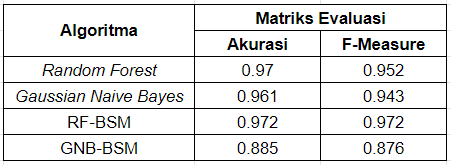

## Model Deployment

### Train the selected model

In [52]:
# pickle_out = open('rf_bsm_classifier.pkl', mode = 'wb')
# pickle.dump(rf_bsm, pickle_out)
# pickle_out.close()

In [100]:
final_model = rf_bsm.fit(X_bsm, y_bsm)

In [101]:
prediction = final_model.predict([[6, 4, 5, 1.456522, 1.880235, 1, 3, 2, 1]])
print(prediction)

[1]


In [102]:
pred2 = final_model.predict([[0.933372, 0.298226, 0.659331, 0.404773, 0.384657, -0.685941, 0.279085, -0.371929, -0.312254]])
print(pred2)

[1]


In [103]:
pred3 = final_model.predict([[0.542557, -0.437371, -0.100918, -0.868595, 0.822592, -0.067705, -0.183838, 1.897661, -0.312254]])
print(pred3)

[1]


In [105]:
pred4 = final_model.predict([[0.151743, -0.805169, -0.861167, -0.868595, -0.666349, -0.685941, -0.183838, -0.696156, -0.312254]])
print(pred4)

[0]


In [109]:
pred5 = final_model.predict(X_bsm[-5:-1])
pred5

array([1, 1, 1, 1], dtype=int64)

In [106]:
X_bsm[:5]

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
0,0.151743,-0.805169,-0.861167,-0.868595,-0.666349,-0.685941,-0.183838,-0.696156,-0.312254
1,0.151743,0.298226,0.279207,1.068263,1.609839,2.096120,-0.183838,-0.371929,-0.312254
2,-0.629885,-0.805169,-0.861167,-0.868595,-0.666349,-0.376823,-0.183838,-0.696156,-0.312254
3,0.542557,1.769419,1.799705,-0.868595,0.070354,0.241413,-0.183838,1.249207,-0.312254
4,-0.239071,-0.805169,-0.861167,0.453516,-0.666349,-0.685941,-0.183838,-0.696156,-0.312254


In [108]:
pred5

array([0, 0, 0, 0, 0], dtype=int64)

### Model Extraction Using Pickle

In [110]:
pickle_out = open('rf_bsm_final_model.pkl', mode = 'wb')
pickle.dump(final_model, pickle_out)
pickle_out.close()

In [111]:
pickle_out_scaler = open('bsm_scaler.pkl', mode = 'wb')
pickle.dump(bsm_scaler, pickle_out_scaler)
pickle_out_scaler.close()